In [1]:
import numpy as np
import matplotlib.pyplot as plt
import subprocess
import os

In [2]:
!mvn clean package > NUL

Página de códigos activa: 1252


In [3]:
def run_java(args):
    JAR_FILE = "target/IPP-TP2-1.0.jar"
    MAIN_CLASS = "nqueens.NQueensMain"

    if not os.path.isfile(JAR_FILE):
        print(f"No se encontró {JAR_FILE}")
        print("Compilando con Maven...")
        !mvn clean package
    
    cmd = ["java"] + args.split() + ["-cp", JAR_FILE, MAIN_CLASS]

    result = subprocess.run(cmd, capture_output=True, text=True)

    if result.returncode != 0:
        print("Error al ejecutar Java:", result.stderr)
        return []

    times = [float(line.strip()) for line in result.stdout.splitlines() if line.strip()]
    return times       

In [34]:
n_values = range(4, 16)
num_threads = 8
times = 3
types = ['sequential', 'parallel', 'fork_join', 'virtual_per_row']

In [11]:
summary = {}

for t in types:
    summary[t] = {}
    for n in n_values:
        args = f"-DN={n} -DnumThreads={num_threads} -Dtimes={times} -Dtype={t}"
        run_times = run_java(args)
        if run_times:
            mean = np.mean(run_times)
            std = np.std(run_times)
            summary[t][n] = {"mean": mean, "std": std}
            if n > 10:
                print(f"{t} N {n}: mean={mean:.10f} s, std={std:.10f} s")

sequential N 11: mean=0.0146974667 s, std=0.0013916310 s
sequential N 12: mean=0.0930000667 s, std=0.0022126646 s
sequential N 13: mean=0.5508894667 s, std=0.0012097192 s
sequential N 14: mean=4.4516418333 s, std=0.6048983602 s
sequential N 15: mean=31.3547023333 s, std=0.9757870259 s
parallel N 11: mean=0.0101657000 s, std=0.0066533492 s
parallel N 12: mean=0.0296347333 s, std=0.0059067491 s
parallel N 13: mean=0.1390712333 s, std=0.0038879910 s
parallel N 14: mean=0.8152223000 s, std=0.0061347278 s
parallel N 15: mean=5.8733551667 s, std=0.1615129014 s
fork_join N 11: mean=0.0261652667 s, std=0.0069234925 s
fork_join N 12: mean=0.0652736000 s, std=0.0084439136 s
fork_join N 13: mean=0.1748631667 s, std=0.0172696451 s
fork_join N 14: mean=0.9986527333 s, std=0.0120359087 s
fork_join N 15: mean=7.1286671333 s, std=0.2958772583 s
virtual_per_row N 11: mean=0.0161916667 s, std=0.0096688034 s
virtual_per_row N 12: mean=0.0288614333 s, std=0.0081780098 s
virtual_per_row N 13: mean=0.168431

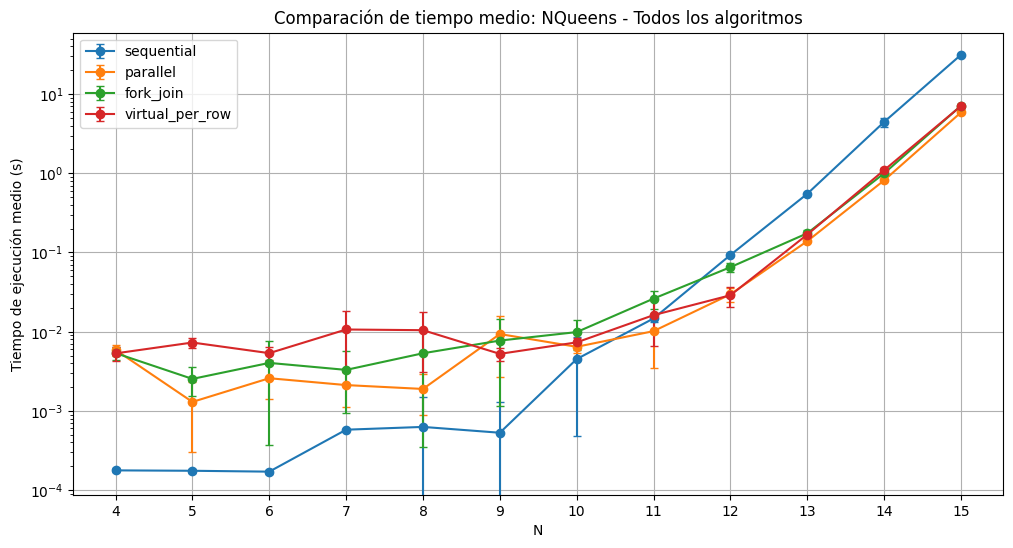

In [35]:
plt.figure(figsize=(12, 6))
for t in types:
    n_vals = sorted(summary[t].keys())
    means = [summary[t][n]['mean'] for n in n_vals]
    stds = [summary[t][n]['std'] for n in n_vals]
    plt.errorbar(n_vals, means, yerr=stds, label=t, marker='o', capsize=3)

plt.xticks(range(min(n_values), max(n_values) + 1))
plt.yscale("log")
plt.xlabel("N")
plt.ylabel("Tiempo de ejecución medio (s)")
plt.title(f"Comparación de tiempo medio: NQueens - Todos los algoritmos")
plt.legend()
plt.grid(True)
plt.show()

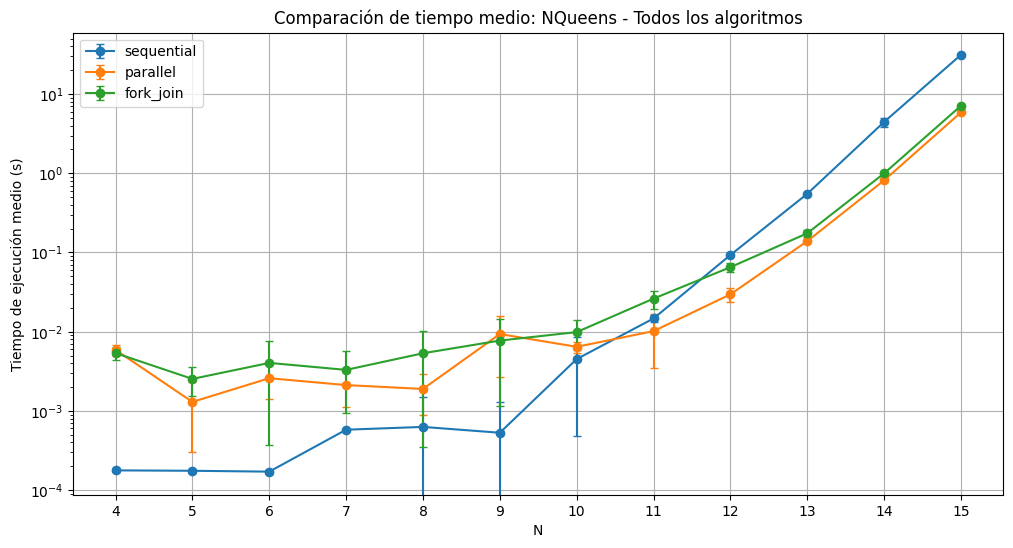

In [36]:
plt.figure(figsize=(12, 6))
for t in ['sequential', 'parallel', 'fork_join']:
    n_vals = sorted(summary[t].keys())
    means = [summary[t][n]['mean'] for n in n_vals]
    stds = [summary[t][n]['std'] for n in n_vals]
    plt.errorbar(n_vals, means, yerr=stds, label=t, marker='o', capsize=3)

plt.xticks(range(min(n_values), max(n_values) + 1))
plt.yscale("log")
plt.xlabel("N")
plt.ylabel("Tiempo de ejecución medio (s)")
plt.title(f"Comparación de tiempo medio: NQueens - Todos los algoritmos")
plt.legend()
plt.grid(True)
plt.show()

In [4]:
n_values = range(10, 16)
thread_values = [1, 2, 4, 6, 8]
types = ['sequential', 'parallel', 'fork_join']
times = 3

summary = {t: {} for t in types}

for t in types:
    for n in n_values:
        summary[t][n] = {}
        if t == "sequential":
            args = f"-DN={n} -DnumThreads=1 -Dtimes={times} -Dtype={t}"
            run_times = run_java(args)
            if run_times:
                mean = np.mean(run_times)
                std = np.std(run_times)
                summary[t][n][1] = {"mean": mean, "std": std}
                print(f"{t} N {n}: mean={mean:.6f} s, std={std:.6f} s")
        else:
            # Para parallel y fork_join sí variamos threads
            for num_threads in thread_values:
                args = f"-DN={n} -DnumThreads={num_threads} -Dtimes={times} -Dtype={t}"
                run_times = run_java(args)
                if run_times:
                    mean = np.mean(run_times)
                    std = np.std(run_times)
                    summary[t][n][num_threads] = {"mean": mean, "std": std}
                    print(f"{t} N {n}, {num_threads} threads: mean={mean:.6f} s, std={std:.6f} s")

sequential N 10: mean=0.003933 s, std=0.000817 s
sequential N 11: mean=0.019002 s, std=0.001410 s
sequential N 12: mean=0.102612 s, std=0.002237 s
sequential N 13: mean=0.591962 s, std=0.012737 s
sequential N 14: mean=4.514581 s, std=0.536160 s
sequential N 15: mean=31.539680 s, std=0.444412 s
parallel N 10, 1 threads: mean=0.004596 s, std=0.006500 s
parallel N 10, 2 threads: mean=0.006443 s, std=0.006690 s
parallel N 10, 4 threads: mean=0.010475 s, std=0.007412 s
parallel N 10, 6 threads: mean=0.008767 s, std=0.010762 s
parallel N 10, 8 threads: mean=0.007300 s, std=0.010324 s
parallel N 11, 1 threads: mean=0.022838 s, std=0.005048 s
parallel N 11, 2 threads: mean=0.015786 s, std=0.012872 s
parallel N 11, 4 threads: mean=0.009936 s, std=0.007082 s
parallel N 11, 6 threads: mean=0.016844 s, std=0.008368 s
parallel N 11, 8 threads: mean=0.011303 s, std=0.007617 s
parallel N 12, 1 threads: mean=0.100889 s, std=0.007003 s
parallel N 12, 2 threads: mean=0.060969 s, std=0.004236 s
parallel 

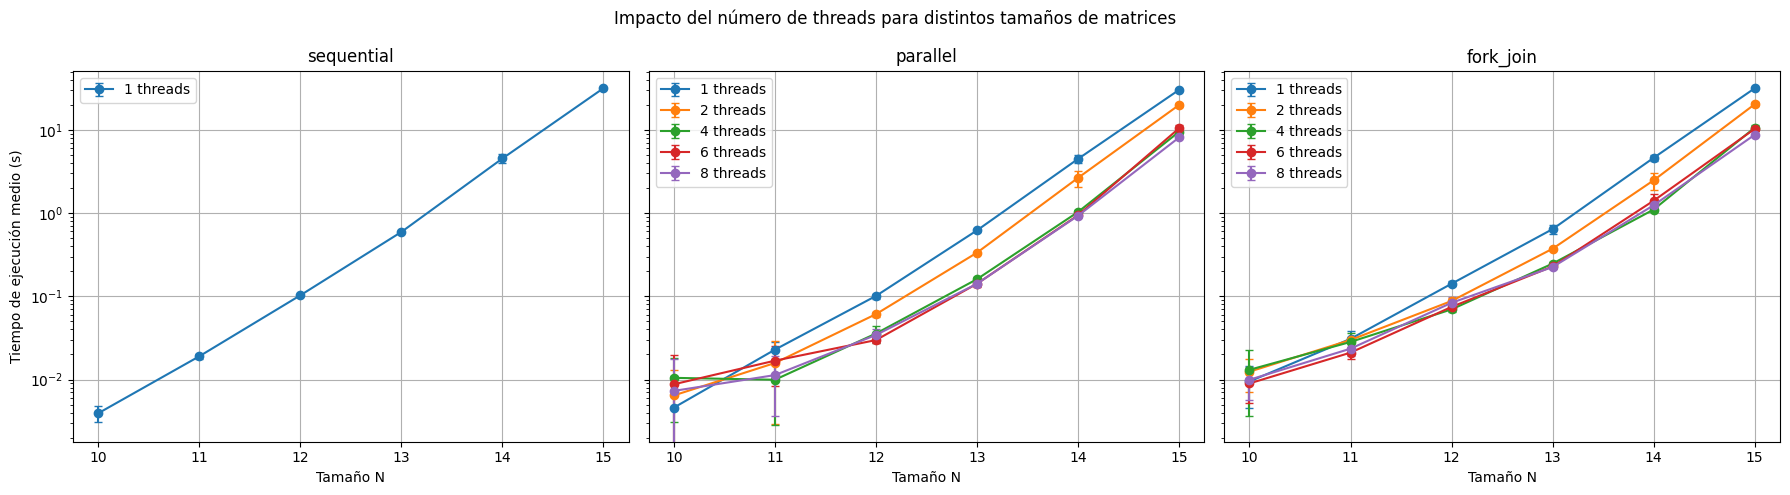

In [6]:
# --- Plot por tipo ---
fig, axes = plt.subplots(1, len(types), figsize=(18, 5), sharey=True)

for ax, t in zip(axes, types):
    for num_threads in sorted({r for n in n_values for r in summary[t][n].keys()}):
        means = [summary[t][n][num_threads]["mean"] for n in n_values if num_threads in summary[t][n]]
        stds = [summary[t][n][num_threads]["std"] for n in n_values if num_threads in summary[t][n]]
        if means:  # puede que sequential solo tenga threads=1
            ax.errorbar(n_values, means, yerr=stds, marker="o", capsize=3, label=f"{num_threads} threads")

    ax.set_xticks(n_values)
    ax.set_title(t)
    ax.set_xlabel("Tamaño N")
    ax.set_xscale("linear")
    ax.set_yscale("log")
    ax.grid(True)
    ax.legend()

axes[0].set_ylabel("Tiempo de ejecución medio (s)")
plt.suptitle("Impacto del número de threads para distintos tamaños de matrices")
plt.tight_layout()
plt.show()